<a href="https://colab.research.google.com/github/Siuuuuuu0/ML-DL/blob/main/NNClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import torch

from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=52
)

In [90]:
X

array([[-0.7409712 ,  0.61073201],
       [-0.16518405,  0.77979567],
       [ 0.16356163,  0.98122242],
       ...,
       [ 0.75622395,  0.24874819],
       [-0.74391164, -0.24503487],
       [-0.40766441,  0.65757212]])

In [91]:
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "label":y
                        })

circles.head()

,X1,X2,label
0,-0.740971,0.610732,0
1,-0.165184,0.779796,1
2,0.163562,0.981222,0
3,0.041243,0.823617,1
4,-0.645638,-0.729016,0


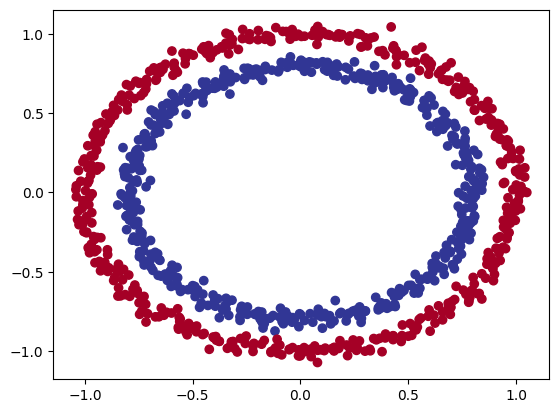

In [92]:
plt.scatter(
    x=X[:, 0],
    y=X[:, 1],
    c=y,
    cmap=plt.cm.RdYlBu
)

In [93]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=52)

In [94]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [95]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=8)
    self.layer_2 = nn.Linear(in_features=8, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

model = CircleModelV0().to(device)
model

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=1, bias=True)
)

In [96]:
next(model.parameters()).device

device(type='cpu')

In [97]:
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=8),
    nn.Linear(in_features=8, out_features=1)
).to(device)

In [98]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5945,  0.4577],
                      [ 0.6960,  0.2209],
                      [ 0.0358, -0.3313],
                      [-0.5355,  0.3280],
                      [-0.4031,  0.5743],
                      [ 0.0465,  0.4344],
                      [-0.2243, -0.3426],
                      [-0.0144,  0.1350]])),
             ('0.bias',
              tensor([ 0.5322, -0.0778, -0.5110,  0.5060,  0.2905,  0.6887, -0.3788,  0.4726])),
             ('1.weight',
              tensor([[-0.2336,  0.1058, -0.0559,  0.0665, -0.3107,  0.2868,  0.2575, -0.1954]])),
             ('1.bias', tensor([0.1503]))])

In [99]:
with torch.inference_mode():
  untrained_preds = model(X_test.to(device))
print(f"Predictions {untrained_preds[:10]}")
print(f"First labels {y_test[:10]}")

Predictions tensor([[-0.0235],
        [ 0.1556],
        [-0.1812],
        [ 0.0965],
        [-0.0052],
        [ 0.1552],
        [ 0.1272],
        [ 0.2057],
        [ 0.0325],
        [-0.1196]])
First labels tensor([0., 1., 0., 1., 1., 1., 0., 0., 1., 1.])


In [100]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

def accuracy_fn(y_true, y_pred):
   correct = torch.eq(y_true, y_pred).sum().item()
   acc = (correct/len(y_pred)) * 100
   return acc